In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('./Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Columns such as 'RowNumber', 'CustomerId', & 'Surname' won't make any difference in the dependent col- 'Exited', so let's just delete those

In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
print("Unique values in Geography column:", df['Geography'].unique())
print("Unique values in Gender column:", df['Gender'].unique())

Unique values in Geography column: ['France' 'Spain' 'Germany']
Unique values in Gender column: ['Female' 'Male']


### Let's see their distribution in the dataset

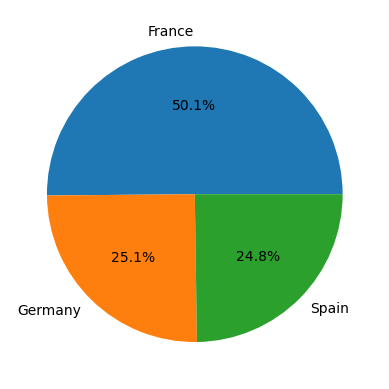

In [13]:
plt.pie(df['Geography'].value_counts(), labels=df['Geography'].value_counts().index, autopct='%1.1f%%')
plt.show()

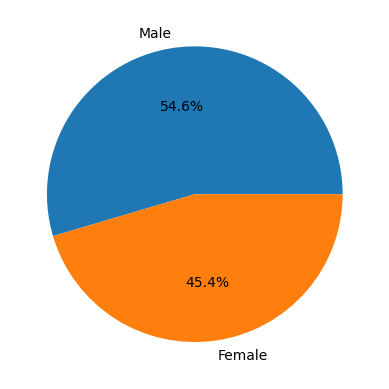

In [14]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [15]:
print("Min credit score value:", df['CreditScore'].min())
print("Max credit score value:", df['CreditScore'].max())

Min credit score value: 350
Max credit score value: 850


### Credit Score distribution

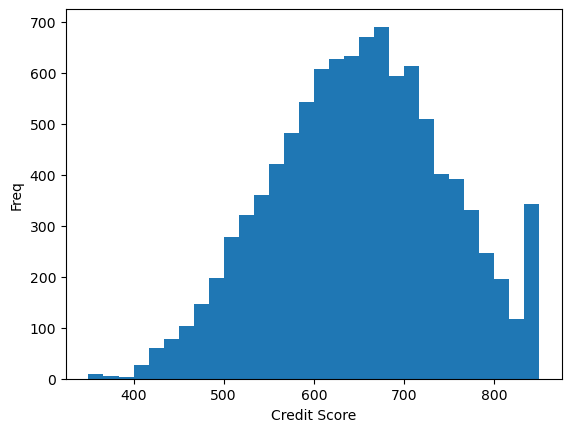

In [17]:
plt.hist(df['CreditScore'], bins=30)
plt.xlabel('Credit Score')
plt.ylabel('Freq')
plt.show()

In [18]:
print("Minimum age:", df['Age'].min())
print("Maximum age:", df['Age'].max())

Minimum age: 18
Maximum age: 92


### Age distribution

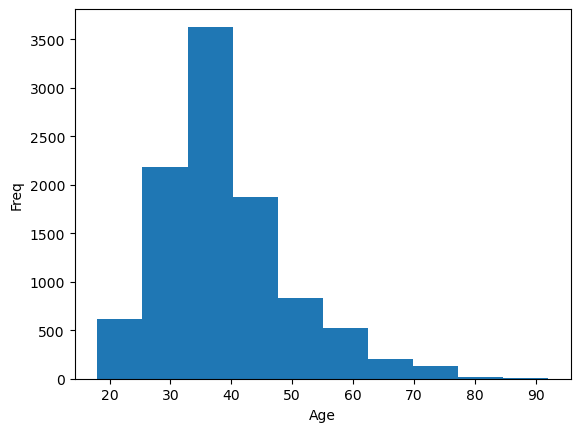

In [20]:
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Freq")
plt.show()

In [38]:
print("Unique values in NumOfProducts:", df['NumOfProducts'].unique())
print("Unique values in HasCrCard:", df['HasCrCard'].unique())
print("Unique values in IsActiveMember:", df['IsActiveMember'].unique())

Unique values in NumOfProducts: [1 3 2 4]
Unique values in HasCrCard: [1 0]
Unique values in IsActiveMember: [1 0]


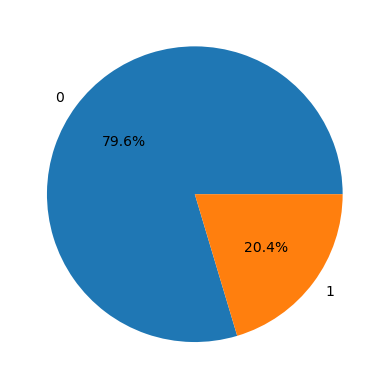

In [85]:
plt.pie(df['Exited'].value_counts(), labels=df['Exited'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [44]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [46]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


In [52]:
df1=df.copy()

In [56]:
X=df1.drop(columns=['Exited'])
y=df1['Exited']

In [66]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [68]:
scaler=StandardScaler()

In [70]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Let's start with LogisticRegression

In [75]:
log_model=LogisticRegression()

In [77]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [79]:
log_model_pred=log_model.predict(X_test_scaled)

In [81]:
print(classification_report(y_test, log_model_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1577
           1       0.58      0.22      0.32       423

    accuracy                           0.80      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.77      0.80      0.76      2000



### Clearly LogisticRegression is not performing well. For Exited=0 it's showing good result but for Exited=1, the scores are really bad. One potential reason could be imbalanced output class. We have around 80% of values where Exited=0 and 20% where Exited=1, so the model did not clearly learn well from the traning data. We need to do something better so that model behaves better

### We have different methods to play with the output dataset like oversampling, undersampling, SMOTE analysis. Let's apply SMOTE analysis and see if get better results

In [94]:
smote=SMOTE(random_state=42)

In [96]:
X_resampled_smote, y_resampled_smote=smote.fit_resample(X_train, y_train)

In [100]:
X1_train, X1_test, y1_train, y1_test=train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2)

In [104]:
X1_train_scaled=scaler.fit_transform(X1_train)
X1_test_scaled=scaler.transform(X1_test)

In [106]:
log_model.fit(X1_train_scaled, y1_train)

LogisticRegression()

In [108]:
log_model_pred1=log_model.predict(X1_test_scaled)

In [110]:
print(classification_report(y1_test, log_model_pred1))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1254
           1       0.78      0.79      0.78      1301

    accuracy                           0.78      2555
   macro avg       0.78      0.78      0.78      2555
weighted avg       0.78      0.78      0.78      2555



### Now, the situation looks better. As you can see the the model is giving an avg result in both the cases and not just exited=0 case. Simply put: SMOTE analysis improved the score